# TODO
1. resize the image
2. overlay the colours over the original image
3. understand the tree.query

In [2]:
import cv2
import sys
import pandas as pd
import numpy as np
from PIL import Image

In [32]:
image_test = cv2.imread('p.jpg')
image_test

array([[[  1,   8,  23],
        [  3,  10,  25],
        [  7,  15,  28],
        ...,
        [  2,   4,   5],
        [  4,   6,   7],
        [  5,   7,   8]],

       [[ 10,  17,  32],
        [ 14,  22,  35],
        [ 19,  27,  40],
        ...,
        [  2,   4,   5],
        [  3,   5,   6],
        [  4,   6,   7]],

       [[ 19,  25,  38],
        [ 25,  31,  44],
        [ 31,  37,  50],
        ...,
        [  4,   6,   7],
        [  5,   7,   8],
        [  5,   7,   8]],

       ...,

       [[ 18,  29,  57],
        [ 12,  23,  50],
        [  9,  20,  48],
        ...,
        [104, 104, 110],
        [128, 128, 134],
        [121, 121, 127]],

       [[ 20,  31,  58],
        [ 13,  25,  49],
        [  7,  18,  45],
        ...,
        [100, 100, 106],
        [124, 124, 130],
        [116, 116, 122]],

       [[ 22,  34,  58],
        [ 14,  27,  49],
        [  8,  20,  44],
        ...,
        [ 98,  98, 104],
        [119, 119, 125],
        [109, 109, 115]]

In [33]:
type(image_test)

numpy.ndarray

In [34]:
image_test.shape

(471, 600, 3)

In [35]:
b, g, r = image_test[80,160]
print(b, g, r)

33 43 67


In [36]:
concatenated_lists = np.concatenate(image_test, axis=0)
concatenated_lists.shape

(282600, 3)

In [37]:
new_array = [tuple(row) for row in concatenated_lists]
uniques = np.unique(new_array, axis=0)
uniques.shape

(43525, 3)

In [38]:
uniques

array([[  0,   4,   5],
       [  0,  14,  39],
       [  0,  15,  61],
       ...,
       [215, 213, 225],
       [216, 213, 215],
       [218, 210, 211]], dtype=uint8)

In [39]:
import csv
from scipy import spatial as sp

DMC_CSV = "dmc.csv"

dmc_colors = []
with open(DMC_CSV, newline="") as csvfile:
    reader = csv.DictReader(csvfile)
    for index, row in enumerate(reader):
        dmc_colors.append(
            {
                "index": index,
                "floss": "#" + row["floss#"],
                "description": row["description"],
                "red": int(row["red"]),
                "green": int(row["green"]),
                "blue": int(row["blue"]),
                "hex": "#" + row["hex"],
                "dmc_row": row["row"],
            }
        )
rgb_colors = []

for color in dmc_colors:
    rgb_colors.append((color["red"], color["green"], color["blue"]))
print(dmc_colors)

[{'index': 0, 'floss': '#3713', 'description': 'Salmon Very Light', 'red': 255, 'green': 226, 'blue': 226, 'hex': '#FFE2E2', 'dmc_row': 'row 01-01'}, {'index': 1, 'floss': '#761', 'description': 'Salmon Light', 'red': 255, 'green': 201, 'blue': 201, 'hex': '#FFC9C9', 'dmc_row': 'row 01-02'}, {'index': 2, 'floss': '#760', 'description': 'Salmon', 'red': 245, 'green': 173, 'blue': 173, 'hex': '#F5ADAD', 'dmc_row': 'row 01-03'}, {'index': 3, 'floss': '#3712', 'description': 'Salmon Medium', 'red': 241, 'green': 135, 'blue': 135, 'hex': '#F18787', 'dmc_row': 'row 01-04'}, {'index': 4, 'floss': '#3328', 'description': 'Salmon Dark', 'red': 227, 'green': 109, 'blue': 109, 'hex': '#E36D6D', 'dmc_row': 'row 01-05'}, {'index': 5, 'floss': '#347', 'description': 'Salmon Very Dark', 'red': 191, 'green': 45, 'blue': 45, 'hex': '#BF2D2D', 'dmc_row': 'row 01-06'}, {'index': 6, 'floss': '#353', 'description': 'Peach', 'red': 254, 'green': 215, 'blue': 204, 'hex': '#FED7CC', 'dmc_row': 'row 01-07'}, {

In [40]:
def rgb_to_dmc(r, g, b):
    tree = sp.KDTree(rgb_colors)
    # don't need the Euclidean distance only the index
    _, reduced_colours_image = tree.query((r, g, b)) # TODO
    return dmc_colors[reduced_colours_image]

rgb_to_dmc(241, 195, 107) #241  195 107

{'index': 314,
 'floss': '#3821',
 'description': 'Straw',
 'red': 243,
 'green': 206,
 'blue': 117,
 'hex': '#F3CE75',
 'dmc_row': 'row 13-25'}

In [41]:
colours_list = [(rgb_to_dmc(element[2], element[1], element[0])) for element in uniques]
print(len(colours_list))
colours_list

43525


[{'index': 453,
  'floss': '#310',
  'description': 'Black',
  'red': 0,
  'green': 0,
  'blue': 0,
  'hex': '#0',
  'dmc_row': 'row 19-16'},
 {'index': 407,
  'floss': '#3371',
  'description': 'Black Brown',
  'red': 30,
  'green': 17,
  'blue': 8,
  'hex': '#1E1108',
  'dmc_row': 'row 17-18'},
 {'index': 406,
  'floss': '#938',
  'description': 'Coffee Brown Ult Dk',
  'red': 54,
  'green': 31,
  'blue': 14,
  'hex': '#361F0E',
  'dmc_row': 'row 17-17'},
 {'index': 406,
  'floss': '#938',
  'description': 'Coffee Brown Ult Dk',
  'red': 54,
  'green': 31,
  'blue': 14,
  'hex': '#361F0E',
  'dmc_row': 'row 17-17'},
 {'index': 406,
  'floss': '#938',
  'description': 'Coffee Brown Ult Dk',
  'red': 54,
  'green': 31,
  'blue': 14,
  'hex': '#361F0E',
  'dmc_row': 'row 17-17'},
 {'index': 406,
  'floss': '#938',
  'description': 'Coffee Brown Ult Dk',
  'red': 54,
  'green': 31,
  'blue': 14,
  'hex': '#361F0E',
  'dmc_row': 'row 17-17'},
 {'index': 406,
  'floss': '#938',
  'descript

In [42]:
unique_colours_list = [dict(t) for t in {tuple(d.items()) for d in colours_list}]
len(unique_colours_list)

162

In [43]:
unique_colours_list

[{'index': 401,
  'floss': '#435',
  'description': 'Brown Very Light',
  'red': 184,
  'green': 119,
  'blue': 72,
  'hex': '#B87748',
  'dmc_row': 'row 17-12'},
 {'index': 260,
  'floss': '#3052',
  'description': 'Green Gray Md',
  'red': 136,
  'green': 146,
  'blue': 104,
  'hex': '#889268',
  'dmc_row': 'row 11-21'},
 {'index': 88,
  'floss': '#3740',
  'description': 'Antique Violet Dark',
  'red': 120,
  'green': 87,
  'blue': 98,
  'hex': '#785762',
  'dmc_row': 'row 04-18'},
 {'index': 92,
  'floss': '#154',
  'description': 'Grape Very Dark',
  'red': 87,
  'green': 36,
  'blue': 51,
  'hex': '#572433',
  'dmc_row': 'row 04-22'},
 {'index': 389,
  'floss': '#632',
  'description': 'Desert Sand Ult Vy Dk',
  'red': 135,
  'green': 85,
  'blue': 57,
  'hex': '#875539',
  'dmc_row': 'row 16-25'},
 {'index': 286,
  'floss': '#832',
  'description': 'Golden Olive',
  'red': 189,
  'green': 155,
  'blue': 81,
  'hex': '#BD9B51',
  'dmc_row': 'row 12-22'},
 {'index': 85,
  'floss':

In [44]:
seq = [x['floss'] for x in colours_list]
print(len(seq))
print(seq)

43525
['#310', '#3371', '#938', '#938', '#938', '#938', '#938', '#938', '#938', '#938', '#938', '#3371', '#938', '#938', '#3371', '#3371', '#938', '#3371', '#938', '#938', '#300', '#938', '#938', '#938', '#898', '#898', '#898', '#918', '#938', '#938', '#918', '#918', '#898', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#400', '#310', '#310', '#310', '#3371', '#3371', '#938', '#938', '#938', '#898', '#918', '#918', '#918', '#918', '#918', '#918', '#400', '#310', '#310', '#310', '#310', '#310', '#310', '#310', '#938', '#938', '#938', '#938', '#898', '#938', '#898', '#938', '#938', '#898', '#300', '#300', '#918', '#918', '#898', '#918', '#918', '#918', '#918', '#918', '#918', '#918', '#400', '#918', '#400', '#400', '#919', '#310', '#310', '#310', '#310', '#310', '#310', '#3371', '#310', '#3371', '#3371', '#3371', '#3371', '#3371', '#938', '#3371', '#938', '#938', '#938', '#938', '#898', '#938', '#938', '#938', '#898', '#938', '#3

In [45]:
# https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter
floss_counts = Counter(seq)
floss_counts

Counter({'#310': 51,
         '#3371': 1265,
         '#938': 2332,
         '#300': 159,
         '#898': 2119,
         '#918': 1127,
         '#400': 915,
         '#919': 825,
         '#3857': 1975,
         '#680': 726,
         '#975': 601,
         '#3829': 81,
         '#934': 2091,
         '#801': 875,
         '#920': 341,
         '#781': 235,
         '#433': 1620,
         '#780': 146,
         '#782': 346,
         '#3777': 449,
         '#921': 4,
         '#3031': 803,
         '#935': 695,
         '#301': 140,
         '#783': 268,
         '#154': 188,
         '#355': 51,
         '#434': 233,
         '#3852': 565,
         '#869': 112,
         '#632': 113,
         '#838': 267,
         '#936': 366,
         '#986': 1294,
         '#581': 11,
         '#839': 76,
         '#3826': 323,
         '#3346': 632,
         '#976': 349,
         '#902': 3,
         '#730': 7,
         '#3781': 60,
         '#221': 18,
         '#3799': 586,
         '#937': 6,
       

In [46]:
floss_counts.most_common()

[('#938', 2332),
 ('#898', 2119),
 ('#934', 2091),
 ('#3857', 1975),
 ('#433', 1620),
 ('#986', 1294),
 ('#3371', 1265),
 ('#918', 1127),
 ('#832', 1010),
 ('#400', 915),
 ('#801', 875),
 ('#919', 825),
 ('#987', 819),
 ('#3031', 803),
 ('#680', 726),
 ('#367', 702),
 ('#935', 695),
 ('#320', 658),
 ('#3346', 632),
 ('#975', 601),
 ('#414', 595),
 ('#3799', 586),
 ('#3852', 565),
 ('#646', 546),
 ('#503', 531),
 ('#3777', 449),
 ('#317', 438),
 ('#647', 423),
 ('#645', 395),
 ('#169', 393),
 ('#648', 391),
 ('#3021', 379),
 ('#927', 376),
 ('#936', 366),
 ('#371', 354),
 ('#976', 349),
 ('#3347', 348),
 ('#452', 348),
 ('#782', 346),
 ('#920', 341),
 ('#3864', 340),
 ('#370', 337),
 ('#833', 337),
 ('#318', 324),
 ('#3826', 323),
 ('#372', 318),
 ('#3022', 283),
 ('#3787', 269),
 ('#783', 268),
 ('#838', 267),
 ('#522', 240),
 ('#781', 235),
 ('#434', 233),
 ('#413', 233),
 ('#3816', 228),
 ('#913', 219),
 ('#535', 218),
 ('#3051', 214),
 ('#3053', 213),
 ('#309', 211),
 ('#422', 201),

In [47]:
floss_use_percentage = [
    (i, floss_counts[i] / len(colours_list) * 100.0)
    for i  in floss_counts]
floss_use_percentage

[('#310', 0.11717403790924756),
 ('#3371', 2.906375646180356),
 ('#938', 5.357840321654222),
 ('#300', 0.3653072946582424),
 ('#898', 4.868466398621482),
 ('#918', 2.5893164847788626),
 ('#400', 2.1022400919012063),
 ('#919', 1.8954623779437105),
 ('#3857', 4.5376220562894884),
 ('#680', 1.6680068925904652),
 ('#975', 1.3808156232050546),
 ('#3829', 0.18609994256174614),
 ('#934', 4.80413555427915),
 ('#801', 2.010338885697875),
 ('#920', 0.7834577828834004),
 ('#781', 0.539919586444572),
 ('#433', 3.7219988512349227),
 ('#780', 0.33543940264215966),
 ('#782', 0.7949454336588166),
 ('#3777', 1.0315910396323953),
 ('#921', 0.009190120620333142),
 ('#3031', 1.8449167145318783),
 ('#935', 1.5967834577828834),
 ('#301', 0.32165422171165997),
 ('#783', 0.6157380815623205),
 ('#154', 0.4319356691556577),
 ('#355', 0.11717403790924756),
 ('#434', 0.5353245261344055),
 ('#3852', 1.2981045376220564),
 ('#869', 0.257323377369328),
 ('#632', 0.25962090752441125),
 ('#838', 0.6134405514072372),
 (

In [48]:
limit_low_occuring_threads = 1.5  # %
filtered_floss_list = [
    color for color in floss_use_percentage if color[1] > limit_low_occuring_threads
]
filtered_floss_list

[('#3371', 2.906375646180356),
 ('#938', 5.357840321654222),
 ('#898', 4.868466398621482),
 ('#918', 2.5893164847788626),
 ('#400', 2.1022400919012063),
 ('#919', 1.8954623779437105),
 ('#3857', 4.5376220562894884),
 ('#680', 1.6680068925904652),
 ('#934', 4.80413555427915),
 ('#801', 2.010338885697875),
 ('#433', 3.7219988512349227),
 ('#3031', 1.8449167145318783),
 ('#935', 1.5967834577828834),
 ('#986', 2.973004020677771),
 ('#987', 1.881677197013211),
 ('#832', 2.3205054566341183),
 ('#367', 1.6128661688684665),
 ('#320', 1.5117748420448018)]

In [49]:
floss_num, percent = zip(*filtered_floss_list)
floss_num

('#3371',
 '#938',
 '#898',
 '#918',
 '#400',
 '#919',
 '#3857',
 '#680',
 '#934',
 '#801',
 '#433',
 '#3031',
 '#935',
 '#986',
 '#987',
 '#832',
 '#367',
 '#320')

In [50]:
filtered_floss_list_df = pd.DataFrame(filtered_floss_list).rename(columns={0: 'floss', 1: '%'})
filtered_floss_list_df

,floss,%
0,#3371,2.906376
1,#938,5.357840
2,#898,4.868466
3,#918,2.589316
4,#400,2.102240
5,#919,1.895462
6,#3857,4.537622
7,#680,1.668007
8,#934,4.804136
9,#801,2.010339


In [51]:
unique_colours_list_df = pd.DataFrame(unique_colours_list)
unique_colours_list_df[["floss", "description"]]

,floss,description
0,#435,Brown Very Light
1,#3052,Green Gray Md
2,#3740,Antique Violet Dark
3,#154,Grape Very Dark
4,#632,Desert Sand Ult Vy Dk
...,...,...
157,#3768,Gray Green Dark
158,#564,Jade Very Light
159,#833,Golden Olive Lt
160,#563,Jade Light


In [52]:
merged_colour_taables = pd.merge(filtered_floss_list_df, unique_colours_list_df, how="left", on="floss").sort_values('%', ascending=False)
rgb_palette = merged_colour_taables[["floss", "description", "red", "green", "blue","%"]]

In [53]:
rgb_palette

,floss,description,red,green,blue,%
1,#938,Coffee Brown Ult Dk,54,31,14,5.357840
2,#898,Coffee Brown Vy Dk,73,42,19,4.868466
8,#934,Avocado Grn Black,49,57,25,4.804136
6,#3857,Rosewood Dark,104,37,26,4.537622
10,#433,Brown Med,122,69,31,3.721999
13,#986,Forest Green Vy Dk,64,82,48,2.973004
0,#3371,Black Brown,30,17,8,2.906376
3,#918,Red?Copper Dark,130,52,10,2.589316
15,#832,Golden Olive,189,155,81,2.320505
4,#400,Mahogany Dark,143,67,15,2.102240


In [54]:
len(rgb_palette)

18

In [55]:
 # http://net-informations.com/ds/pd/iterate.htm
rgb_palette_list = [[x, y, z] for x, y,z in zip(rgb_palette['red'], rgb_palette['green'],rgb_palette['blue'])]
rgb_palette_list

[[54, 31, 14],
 [73, 42, 19],
 [49, 57, 25],
 [104, 37, 26],
 [122, 69, 31],
 [64, 82, 48],
 [30, 17, 8],
 [130, 52, 10],
 [189, 155, 81],
 [143, 67, 15],
 [101, 57, 25],
 [166, 69, 16],
 [88, 113, 65],
 [75, 60, 42],
 [188, 141, 14],
 [97, 122, 82],
 [66, 77, 33],
 [105, 136, 90]]

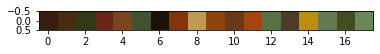

In [56]:
import matplotlib.pyplot as plt
plt.imshow([rgb_palette_list])

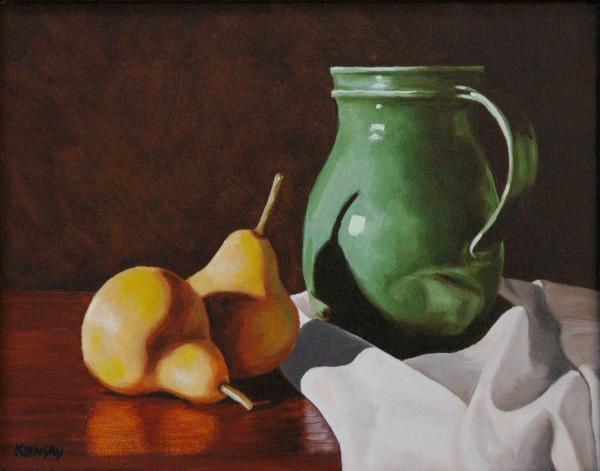

In [57]:
image = Image.open('p.jpg') 
image

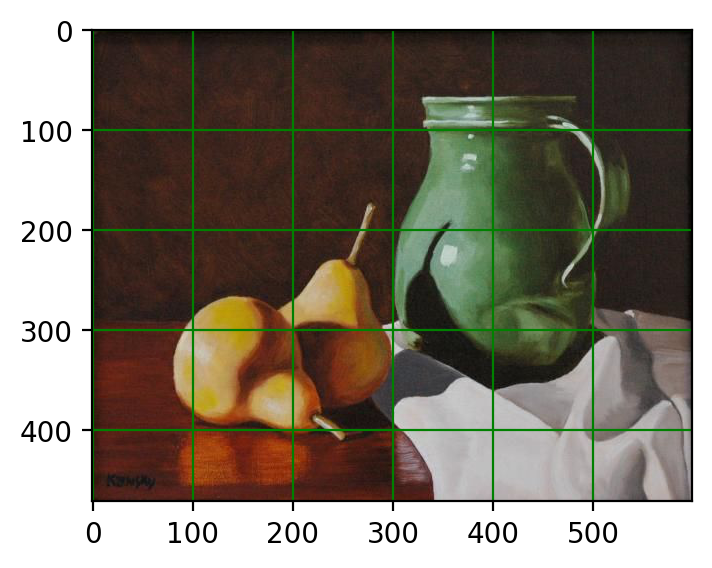

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
try:
    from PIL import Image
except ImportError:
    import Image

# Open image file
image = Image.open('p.jpg')
my_dpi=200.

# Set up figure
fig=plt.figure(figsize=(float(image.size[0])/my_dpi,float(image.size[1])/my_dpi),dpi=my_dpi)
ax=fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)

# Set the gridding interval: here we use the major tick interval
myInterval=100.
loc = plticker.MultipleLocator(base=myInterval)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-', color='g')

# Add the image
ax.imshow(image)

# Find number of gridsquares in x and y direction
nx=abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(myInterval)))
ny=abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(myInterval)))

# Save the figure
fig.savefig('grid-test.jpg')

In [615]:
# import matplotlib.pyplot as plt
# plt.imshow(rgb_palette_list)
# plt.colorbar()
# plt.show()

In [616]:
# image = Image.open('flowers.png').convert('RGB')
# reduced_colours_image = image.convert('P', palette=Image.ADAPTIVE, colors=100)
# reduced_colours_image

In [617]:
# # Arrange all pixels into a tall column of 3 RGB values and find unique rows (colours)
# colours, counts = np.unique(na.reshape(-1,3), axis=0, return_counts=1)
# print(colours.shape)
# print(colours)
# print(counts)

In [618]:
# import csv
# from scipy import spatial as sp

# DMC_CSV = "dmc.csv"

# dmc_colors = []
# with open(DMC_CSV, newline="") as csvfile:
#     reader = csv.DictReader(csvfile)
#     for index, row in enumerate(reader):
#         dmc_colors.append(
#             {
#                 "index": index,
#                 "floss": "#" + row["floss#"],
#                 "description": row["description"],
#                 "red": int(row["red"]),
#                 "green": int(row["green"]),
#                 "blue": int(row["blue"]),
#                 "hex": "#" + row["hex"],
#                 "dmc_row": row["row"],
#             }
#         )
# rgb_colors = []

# for color in dmc_colors:
#     rgb_colors.append((color["red"], color["green"], color["blue"]))
# print(dmc_colors)

In [619]:
# def rgb_to_dmc(r, g, b):
#     tree = sp.KDTree(rgb_colors)
#     # don't need the Euclidean distance only the index
#     _, reduced_colours_image = tree.query((r, g, b))
#     return dmc_colors[reduced_colours_image]

# rgb_to_dmc(33, 108, 163)

In [620]:
# colours_list = [(rgb_to_dmc(element[0], element[1], element[2])) for element in colours]
# print(len(colours_list))
# colours_list

In [621]:
# unique_colours_list = [dict(t) for t in {tuple(d.items()) for d in colours_list}]
# len(unique_colours_list)

In [622]:
# from collections import Counter
# data = Counter(colours_list)
# data.most_common()   # Returns all unique items and their counts
# data.most_common(1)  # Returns the highest occurring item

# seq = [x['floss'] for x in colours_list]
# print(len(seq))
# print(seq)

In [623]:
# # https://docs.python.org/3/library/collections.html#collections.Counter
# from collections import Counter
# floss_counts = Counter(seq)
# floss_counts

In [624]:
# floss_counts.most_common()

In [625]:
# floss_use_percentage = [
#     (i, floss_counts[i] / len(colours) * 100.0)
#     for i  in floss_counts]
# floss_use_percentage

In [626]:
# limit_low_occuring_threads = 1  # %
# filtered_floss_list = [
#     color for color in floss_use_percentage if color[1] > limit_low_occuring_threads
# ]
# filtered_floss_list

In [627]:
# floss_num, percent = zip(*filtered_floss_list)
# filtered_floss_list_df = pd.DataFrame(filtered_floss_list).rename(columns={0: 'floss', 1: '%'})
# unique_colours_list_df = pd.DataFrame(unique_colours_list)
# unique_colours_list_df[["floss", "description"]]
# result = pd.merge(filtered_floss_list_df, unique_colours_list_df, how="left", on="floss").sort_values('%', ascending=False)
# rgb_palette = result[["floss", "red", "green", "blue"]]
#  # http://net-informations.com/ds/pd/iterate.htm
# rgb_palette_list = [[x, y, z] for x, y,z in zip(rgb_palette['red'], rgb_palette['green'],rgb_palette['blue'])]

# import matplotlib.pyplot as plt
# plt.imshow(rgb_palette_list)
# plt.colorbar()
# plt.show()

In [628]:
# import matplotlib.pyplot as plt
# from skimage import io
# palette = np.array(rgb_palette_list, dtype=np.uint8)
# m, n = 4, 4
# indices = np.random.randint(0, len(palette), size=(4, 4))
# io.imshow(palette[indices])